In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, BatchNormalization

Using TensorFlow backend.


In [ ]:
x = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta64allx.npy')/255.0
y = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta64ally.npy')

In [ ]:
x.shape

(72045, 64, 64)

In [ ]:
x = x.reshape(-1,64,64,1)
y = to_categorical(y)

In [ ]:
x.shape

(72045, 64, 64, 1)

In [ ]:
y.shape

(72045, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=.0001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.2, height_shift_range=0.2,  zoom_range=0.2)
datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,batch_size=100),validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
649/649 [==============================] - 119s 184ms/step - loss: 2.1724 - accuracy: 0.1745 - val_loss: 4.2213 - val_accuracy: 0.0949
Epoch 2/10
649/649 [==============================] - 108s 167ms/step - loss: 1.8273 - accuracy: 0.3042 - val_loss: 2.1956 - val_accuracy: 0.1956
Epoch 3/10
649/649 [==============================] - 109s 167ms/step - loss: 1.5822 - accuracy: 0.3983 - val_loss: 4.6689 - val_accuracy: 0.2729
Epoch 4/10
649/649 [==============================] - 109s 167ms/step - loss: 1.2601 - accuracy: 0.4992 - val_loss: 1.5479 - val_accuracy: 0.4608
Epoch 5/10
649/649 [==============================] - 108s 167ms/step - loss: 0.9419 - accuracy: 0.6376 - val_loss: 0.7096 - val_accuracy: 0.7509
Epoch 6/10
649/649 [==============================] - 109s 167ms/step - loss: 0.4456 - accuracy: 0.8593 - val_loss: 2.0154 - val_accuracy: 0.5999
Epoch 7/10
649/649 [==============================] - 108s 167ms/step - loss: 0.2108 - accuracy: 0.9378 - val_loss: 0.1113 -

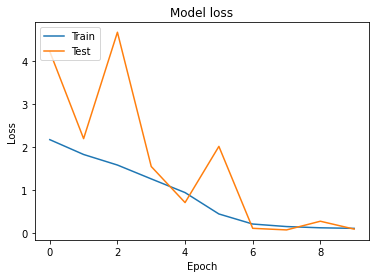

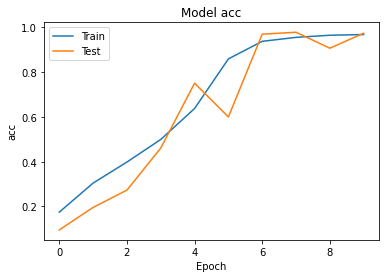

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('VGG16_val_accuracy_97.h5')

In [ ]:
model.save('VGG16_Model.h5')

In [ ]:
all_img = []
for i in range(1,10):
  img1 = cv2.imread(str(i)+'.PNG',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (64,64)))

In [ ]:
all_img = np.array(all_img)

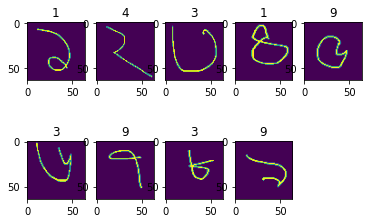

In [ ]:
for i in range(1,10):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,64,64,1)))))